In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

housing = pd.read_csv('/Users/Han/Downloads/Housing.csv')

Vars=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes':1,"no":0})
         

housing[Vars] = housing[Vars].apply(binary_map)
         
random = np.random.seed(0)
df_training, df_testing = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = random)
m = len(df_training)
n = len(df_testing)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [206]:
def computeCost(x, y, theta):
    size = len(x)
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    J = 1/(2 * size) * np.sum(sqrErrors)
    
    return J

In [207]:
def gradientDescent(x, y, val_x, val_y, theta, alpha, iterations):
    size = len(x)
    cost_history = np.zeros(iterations)
    validation_cost = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta = theta - sum_delta;
        cost_history[i] = computeCost(x, y, theta)
        validation_cost[i] = computeCost(val_x, val_y, theta)
        
    return theta, cost_history, validation_cost

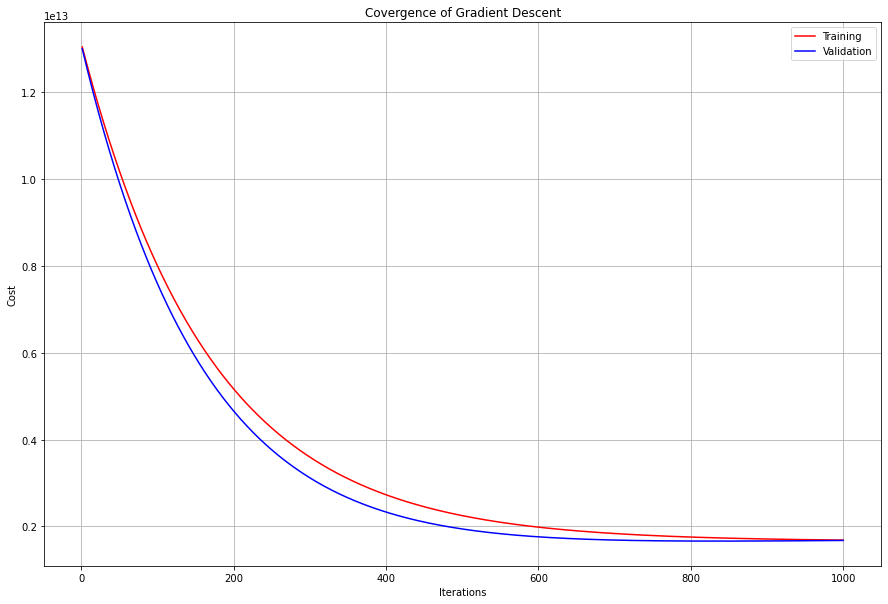

In [235]:
Vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

training_1a = df_training[Vars]
testing_1a = df_testing[Vars]

theta = np.zeros(len(Vars))

y = training_1a.pop('price')
x = training_1a

iterations = 1000
alpha = 0.0000000001

x0 = np.ones((m, 1))
x = np.hstack((x0, x))

val_y = testing_1a.pop('price')
val_x = testing_1a

x0 = np.ones((n, 1))
val_x = np.hstack((x0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [236]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

training_1b = df_training[Vars]
testing_1b = df_testing[Vars]

iterations = 3000
alpha = 0.00000001

theta = np.zeros(len(Vars))

y = training_1b.pop('price')
x = training_1b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_1b.pop('price')
val_x = testing_1b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [  9.32975762 880.90098428  38.14853613  21.87995574  32.608022
   8.22954705   4.44214415   7.72131363   2.29010045   8.79398089
   8.11438159   4.51772127]
cost_history = [7.34258594e+12 4.47600212e+12 3.05333386e+12 ... 1.65148949e+12
 1.65148945e+12 1.65148942e+12]
validation loss = [6.89624196e+12 3.96926948e+12 2.61660826e+12 ... 1.75686599e+12
 1.75686594e+12 1.75686589e+12]


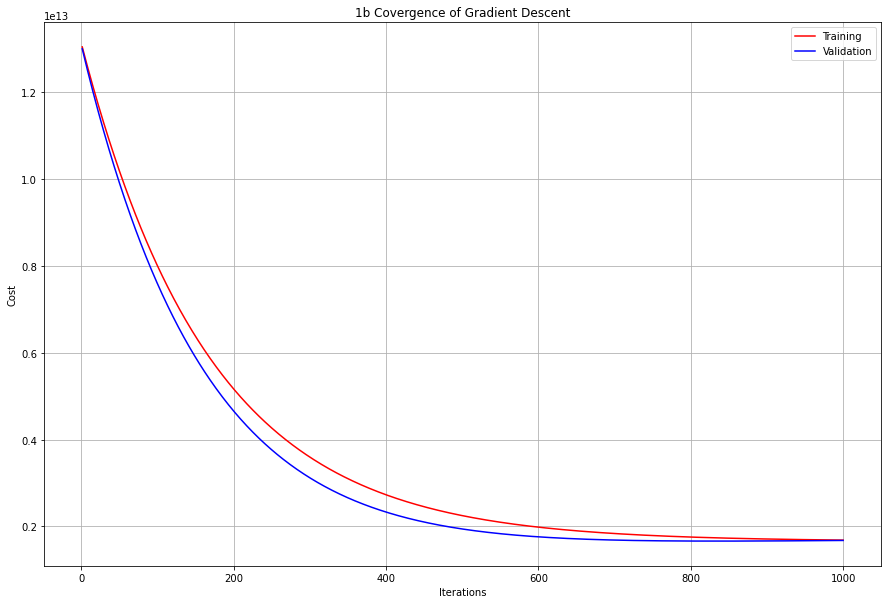

In [231]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('1b Covergence of Gradient Descent')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [239]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

training_2a = df_training[Vars]
testing_2a = df_testing[Vars]

iterations = 2000
alpha = 0.01

# With normalization

scaler = MinMaxScaler()
training_2a[Vars] = scaler.fit_transform(training_2a[Vars] ) 
testing_2a[Vars] = scaler.fit_transform(testing_2a[Vars]) 

theta = np.zeros(len(Vars))

y = training_2a.pop('price')
x = training_2a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_2a.pop('price')
val_x = testing_2a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)
print('')

Final value of theta = [0.08884321 0.16208742 0.10073786 0.15758628 0.13266157 0.12162002]
cost_history = [0.0461728  0.0451099  0.0440779  ... 0.00693182 0.00693146 0.0069311 ]
validation loss = [0.0557536  0.05462289 0.05352287 ... 0.00805983 0.00805918 0.00805852]



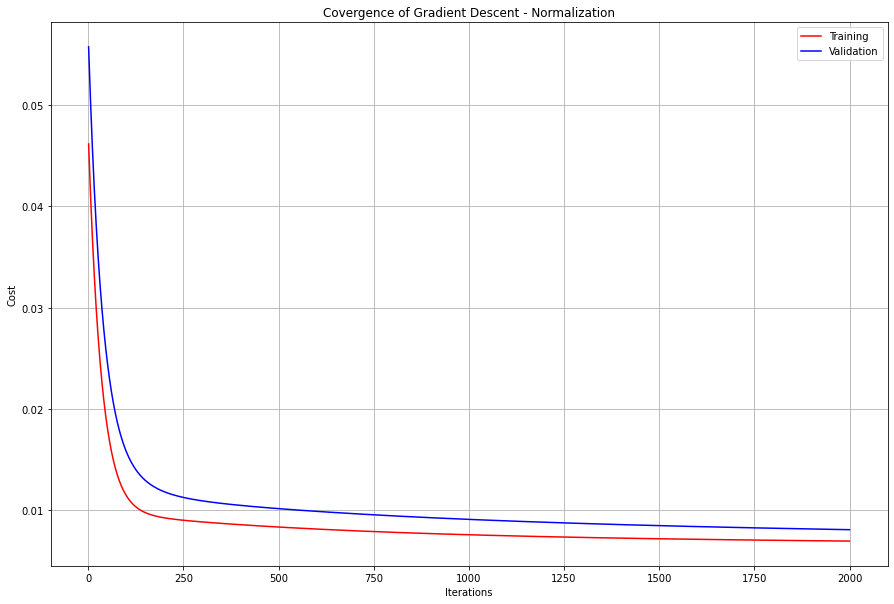

In [240]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Normalization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [249]:
# With standardization

training_2a = df_training[Vars]
testing_2a = df_testing[Vars]

scaler = StandardScaler()
training_2a[Vars] = scaler.fit_transform(training_2a[Vars] ) 
testing_2a[Vars] = scaler.fit_transform(testing_2a[Vars]) 

theta = np.zeros(len(Vars))

y = training_2a.pop('price')
x = training_2a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_2a.pop('price')
val_x = testing_2a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [1.83393691e-16 2.69425037e-01 5.88554064e-02 2.48155802e-01
 1.99253524e-01 9.20248422e-02 8.26018055e-02 9.41581098e-02
 1.40206907e-01 2.32620671e-01 1.16156321e-01 1.62962218e-01]
cost_history = [0.48551244 0.47168853 0.45849763 ... 0.17510401 0.17510401 0.17510401]
validation loss = [0.48461837 0.46992388 0.45588525 ... 0.1427166  0.1427166  0.1427166 ]


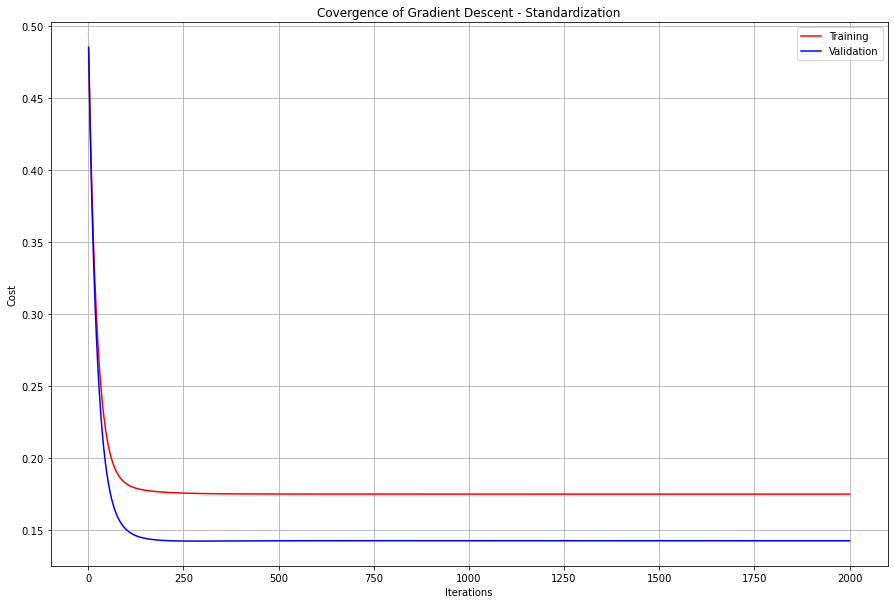

In [250]:
#Standardization plot

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Standardization')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [241]:
Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

training_2b = df_training[Vars]
testing_2b = df_testing[Vars]

iterations = 2000
alpha = 0.01

# With normalization

scaler = MinMaxScaler()
training_2b[Vars] = scaler.fit_transform(training_2b[Vars]) 
testing_2b[Vars] = scaler.fit_transform(testing_2b[Vars]) 

theta = np.zeros(len(Vars))

y = training_2b.pop('price')
x = training_2b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_2b.pop('price')
val_x = testing_2b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)
print('')

Final value of theta = [0.02675712 0.10240897 0.06421662 0.13097588 0.10298569 0.05070949
 0.04483937 0.02613582 0.06727692 0.09081461 0.09096804 0.07749383]
cost_history = [0.04523851 0.04331433 0.04148956 ... 0.0049949  0.0049947  0.00499449]
validation loss = [0.05474675 0.05268313 0.05071976 ... 0.00673417 0.00673377 0.00673336]



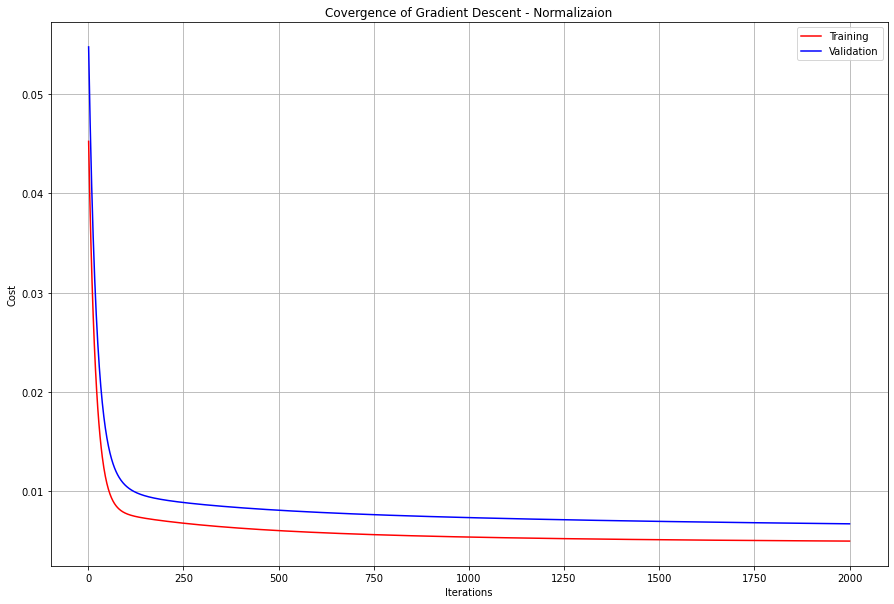

In [242]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Normalizaion')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [243]:
# With standardization

training_2b = df_training[Vars]
testing_2b = df_testing[Vars]

scaler = StandardScaler()
training_2b[Vars] = scaler.fit_transform(training_2b[Vars]) 
testing_2b[Vars] = scaler.fit_transform(testing_2b[Vars]) 

theta = np.zeros(len(Vars))

y = training_2b.pop('price')
x = training_2b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_2b.pop('price')
val_x = testing_2b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [1.83393691e-16 2.69425037e-01 5.88554064e-02 2.48155802e-01
 1.99253524e-01 9.20248422e-02 8.26018055e-02 9.41581098e-02
 1.40206907e-01 2.32620671e-01 1.16156321e-01 1.62962218e-01]
cost_history = [0.48551244 0.47168853 0.45849763 ... 0.17510401 0.17510401 0.17510401]
validation loss = [0.48461837 0.46992388 0.45588525 ... 0.1427166  0.1427166  0.1427166 ]


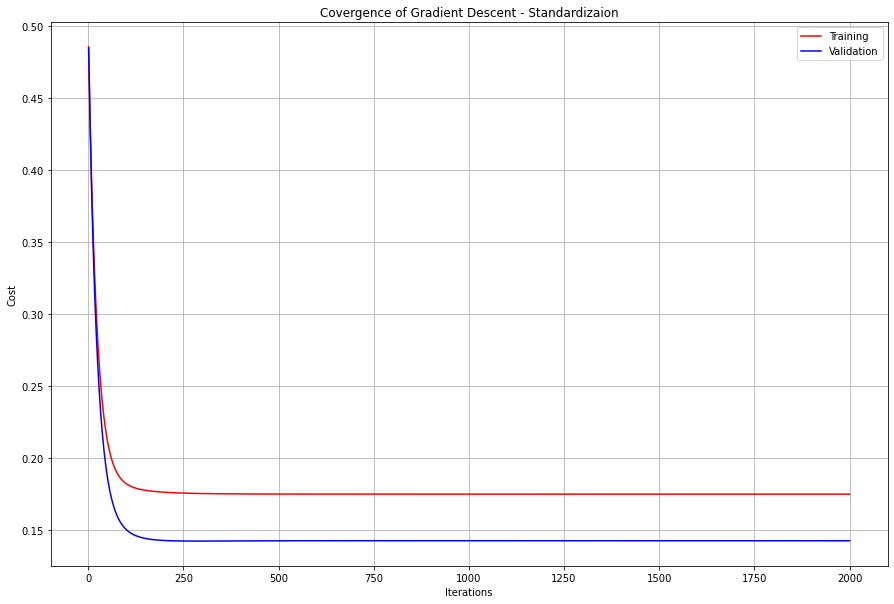

In [244]:
#Standardization plot

iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent - Standardizaion')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [245]:
#Training for Problem 3a


Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

traing_3a = df_training[Vars]
test_3a = df_testing[Vars]

iterations = 2000
alpha = 0.01

scaler = MinMaxScaler()
traing_3a[Vars] = scaler.fit_transform(traing_3a[Vars] ) 
test_3a[Vars] = scaler.fit_transform(test_3a[Vars]) 

theta = np.zeros(len(Vars))

y = traing_3a.pop('price')
x = traing_3a

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = test_3a.pop('price')
val_x = test_3a

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [0.08884321 0.16208742 0.10073786 0.15758628 0.13266157 0.12162002]
cost_history = [0.0461728  0.0451099  0.0440779  ... 0.00693182 0.00693146 0.0069311 ]
validation loss = [0.0557536  0.05462289 0.05352287 ... 0.00805983 0.00805918 0.00805852]


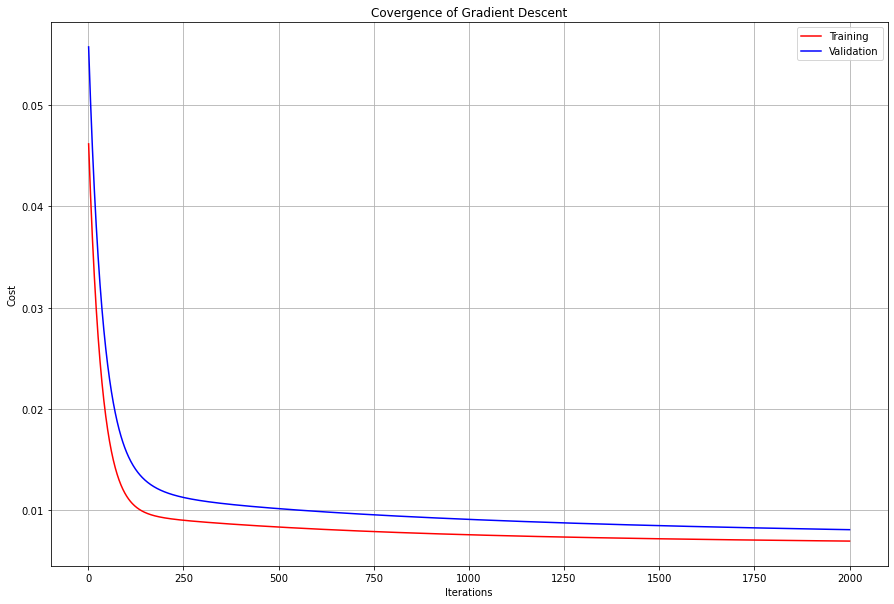

In [246]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

In [247]:
#Training for Problem 3b


Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

training_3b = df_training[Vars]
testing_3b = df_testing[Vars]

iterations = 2000
alpha = 0.01

scaler = MinMaxScaler()
training_3b[Vars] = scaler.fit_transform(training_3b[Vars] ) 
testing_3b[Vars] = scaler.fit_transform(testing_3b[Vars]) 

theta = np.zeros(len(Vars))

y = training_3b.pop('price')
x = training_3b

x_0 = np.ones((m, 1))
x = np.hstack((x_0, x))

val_y = testing_3b.pop('price')
val_x = testing_3b

x_0 = np.ones((n, 1))
val_x = np.hstack((x_0, val_x))

theta, cost_history, validation_cost = gradientDescent(x, y, val_x, val_y, theta, alpha, iterations)

print('Final value of theta =',theta)
print('cost_history =',cost_history)
print('validation loss =', validation_cost)

Final value of theta = [0.02675712 0.10240897 0.06421662 0.13097588 0.10298569 0.05070949
 0.04483937 0.02613582 0.06727692 0.09081461 0.09096804 0.07749383]
cost_history = [0.04523851 0.04331433 0.04148956 ... 0.0049949  0.0049947  0.00499449]
validation loss = [0.05474675 0.05268313 0.05071976 ... 0.00673417 0.00673377 0.00673336]


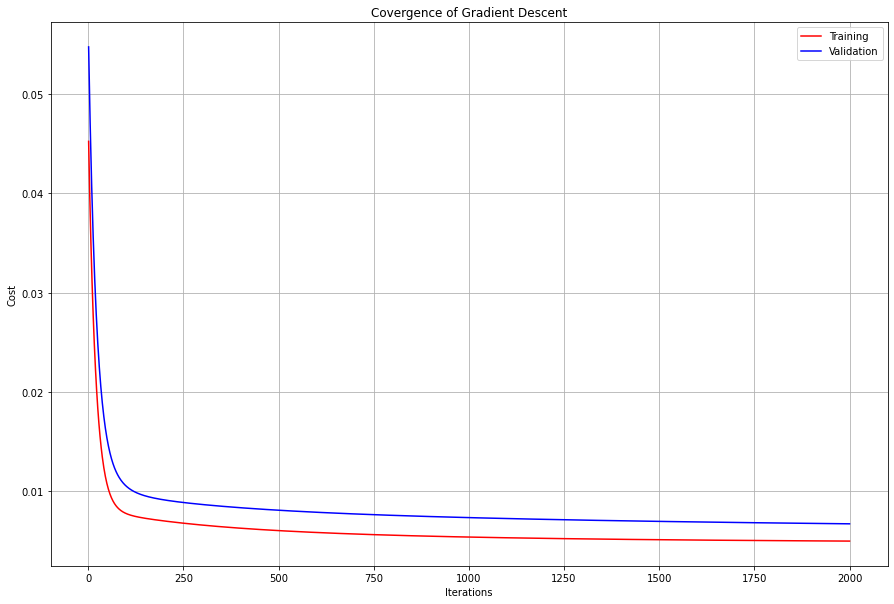

In [248]:
iteration_array = np.arange(1, iterations + 1)

plt.plot(iteration_array, cost_history, color= 'red', label = 'Training')
plt.plot(iteration_array, validation_cost, color= 'blue', label = 'Validation')
plt.grid()
plt.title('Covergence of Gradient Descent')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()